# Chapter 3

## Exercise 8

a. Before performing simple linear regression we should import libraries and database

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)
from scipy.stats import t
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm

We now import the Auto dataset to regress mpg on horsepower. To do so simply, we have imported the function load_data. We could have used also read_csv function availabre in pandas library since Auto dataset is in csv format. 

In [2]:
Auto=load_data("Auto")
Auto.columns #Make sure that all Auto columns are imported

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

### (a)

Next step is to create the model matrix. The matrix should emulate the simple linear regression, i.e: it should contain to factors in order for the sm library to understand that there are two parameters to find

In [3]:
X=pd.DataFrame({"intercept":np.ones(Auto.shape[0]),"lstat":Auto["horsepower"]})

Now we are ready to extract the response and fit the model

In [4]:
y=Auto["mpg"]
model=sm.OLS(y,X)
results=model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
lstat,-0.1578,0.006,-24.489,0.0


i. The p-value associated with both t-stats is near to 0. This shows clearly a strong evidence of the existance of a relationship between "mpg" and "horsepower"

ii. To assess how far the relationship is strong we should check the percentage of variance explained by the model.
For this we should use the $ R^2 $ indicator or the RSE

In [5]:
results.rsquared#For r squared

0.6059482578894348

In [6]:
#For the residual standard error
rse=np.sqrt(results.scale)
rse

4.90575691954594

Now the conclusion is nearly 60% of the variability of "mpg" can be explained by "horsepower". But what about the interpretation of RSE?! To answer we should compare it with the mean of the response.

In [7]:
lack_fit=rse/np.mean(Auto["mpg"])
lack_fit

0.20923714066914834

Hence, the lack of fit is estimated to 20,92%

iii. The more is the horsepower the more mpg will be consumed. (I assume here that "mpg" means the mean consumption of gas)

iv. Predicted mpg associated with a horespower of 98 is computed using the function predict associated with the fitted model
Payattention that preidction should take a dataframe with the same number of columns as a the number of parameters. This is why we have tried to add a column to the number 98

In [8]:
newdf=pd.DataFrame({'point':[98]})
newdf=sm.add_constant(newdf,has_constant='add')#we have changed the argument of has_constant
#from skip to add because 
# add_constant works per default when the list has a variance different from 0
x1=results.get_prediction(newdf)
x1.predicted_mean[0]

24.467077152512424

Now let's look for confidence and prediction intervals with 95%. We use the method summary_frame() available in statsmodels library. The mentionned function can only be applied on PredictionResults class. This is exactly why x1 has been converted to such class in the previous input.

In [9]:
x1.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


### (b)

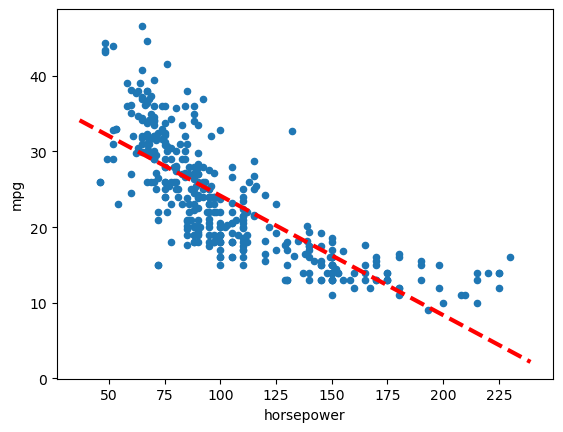

In [10]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,results.params[0],results.params[1],'r--',linewidth=3);

### (c)

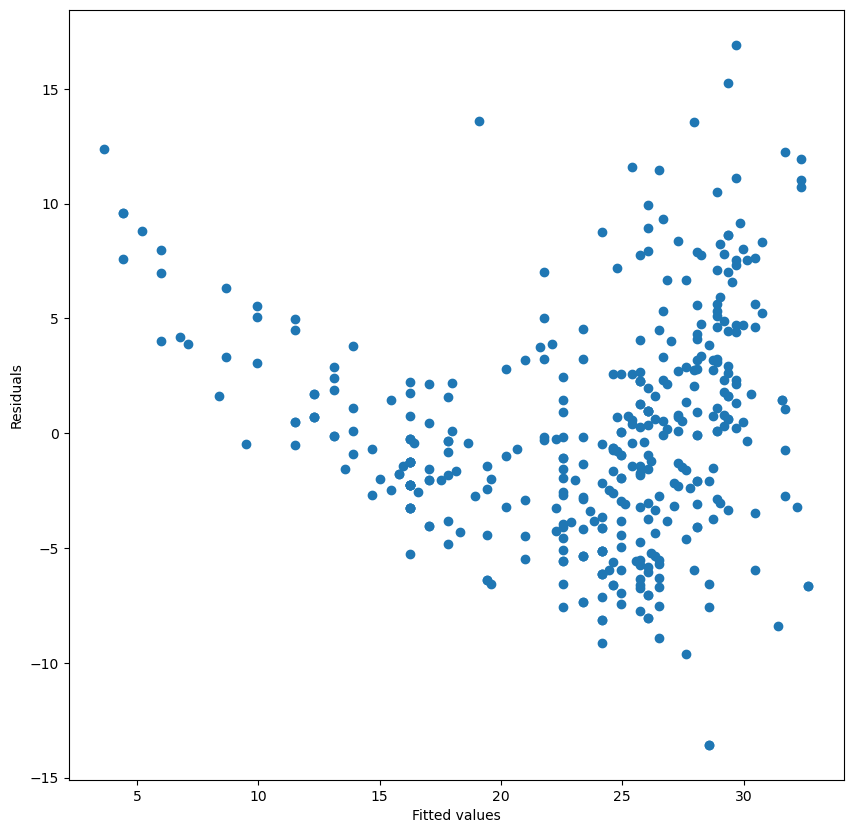

In [11]:
#Draw residuals against fitted values
ax=subplots(figsize=(10,10))[1]
ax.scatter(results.fittedvalues,results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals");

The funnel shape is clear from the plot, which emphasizes the presence heteroscedasticity of the fitted simple linear regression model.<br>
We also realise that relationship between mpg and horsepower is highly non-linear.

115

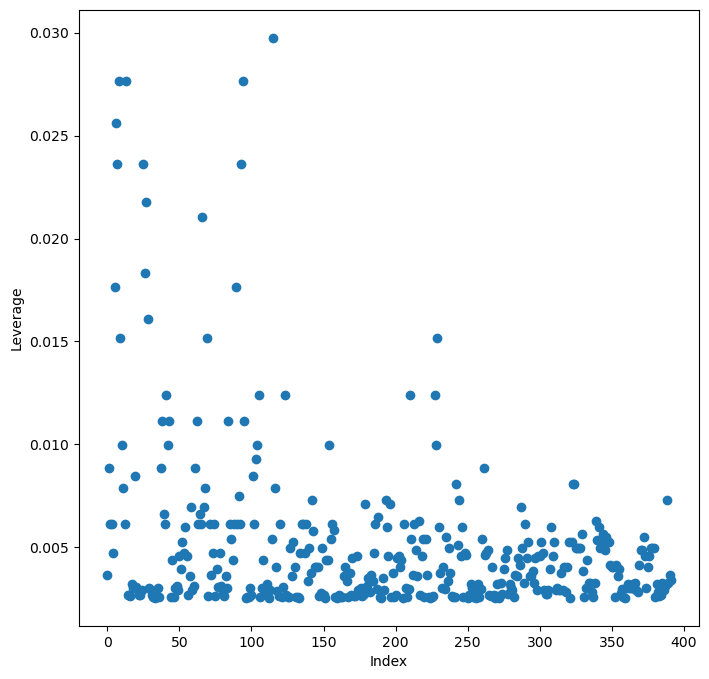

In [12]:
# Plot the leverage stats
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [13]:
n=Auto.shape[0]
leverage_thres=2/n
leverage_thres

0.00510204081632653

The highest leverage stat, which is around 0.03, attended at point 115 is not much larger than the found threshold (=0.005). This indicates there are no high leverage points which need special handling.

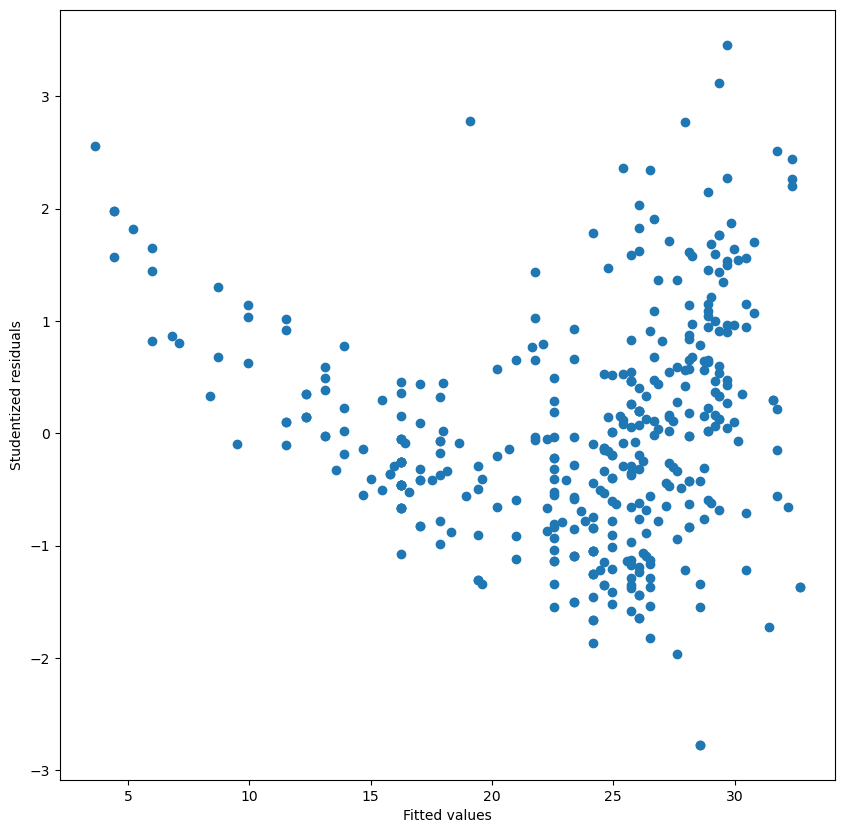

In [14]:
#Draw studentized residuals against fitted values
ax=subplots(figsize=(10,10))[1]
studentized_residuals = results.get_influence().resid_studentized_internal
ax.scatter(results.fittedvalues,studentized_residuals)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Studentized residuals");

In [15]:
df=pd.DataFrame({'fitted':results.fittedvalues,'studentized':studentized_residuals})
df[df['studentized']>3]

,fitted,studentized
320,29.675953,3.458909
327,29.360264,3.114256


Observations 320 and 327 are believed to be (post-analysis) outliers.

## Exercise 9

In [16]:
Auto=load_data("Auto")

In [17]:
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
Auto["origin"].unique()

array([1, 3, 2], dtype=int64)

### (a)

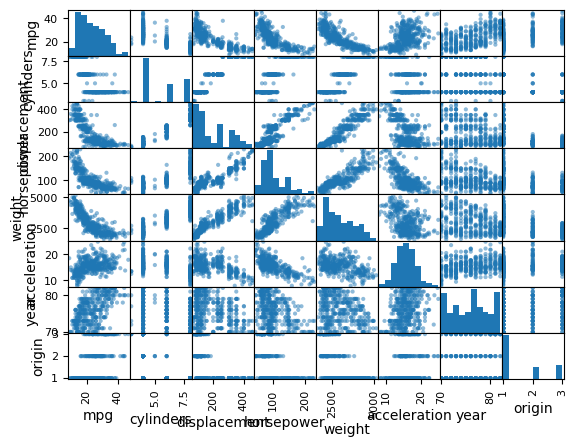

In [19]:
pd.plotting.scatter_matrix(Auto);

In [20]:
Auto.corr(numeric_only=True)
# The parameter mumeric_only is casted to true in order to avoid correlation among categorical values

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c)

In [21]:
y=Auto['mpg']
terms=Auto.columns.drop(['mpg','name'])
X=MS(terms).fit_transform(Auto)
model=sm.OLS(y,X)

In [22]:
res=model.fit()
summarize(res)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


#### (i)

In [23]:
# Now let's use the anova_lm() function. Beware, when faced with a
# single model anova_lm() only works when that model is fitted using statsmodels.formula.api
res1=smf.ols('y~X',data=Auto).fit()
anova_lm(res1)

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19575.989106,2446.998638,220.978484,1.327873e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


F statistic is much larger than 1. Therefore, we must reject the null hypothesis considering the whole regression coefficients are null.

#### (ii)

Displacement, weight, year and origin are the predictors which look to have significant relationships with mpg

#### (iii)

The coefficient suggests that, on average, when the other variables are held constant, an increase of one year (of production) corresponds to an increase of 0.75 of mpg (so, the more recent is the year of production the more efficient is the car).

### (d)

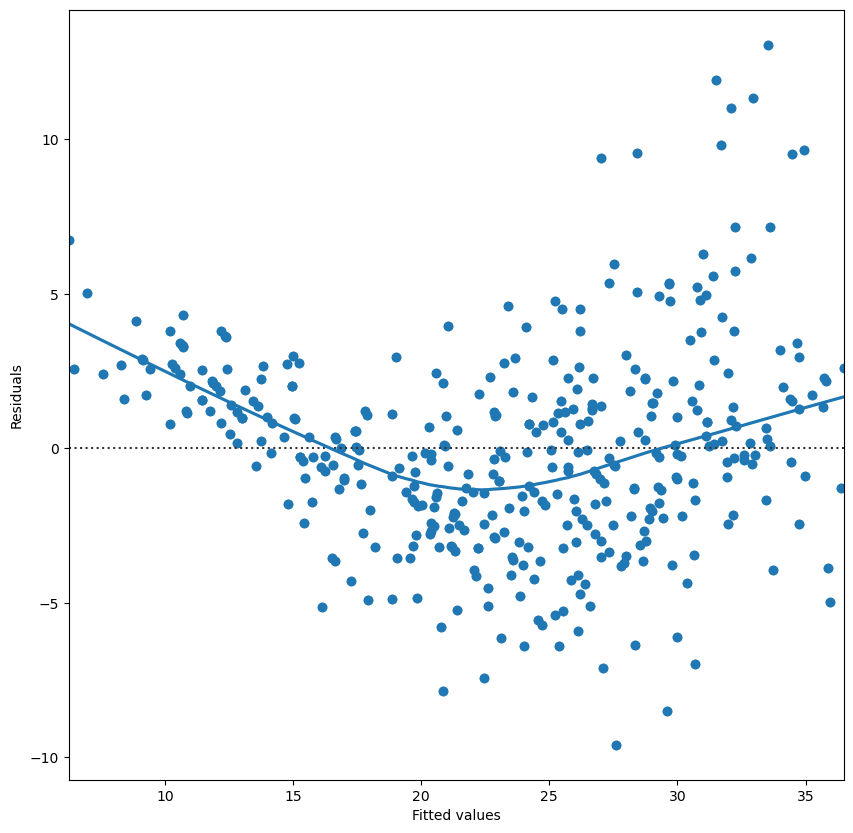

In [24]:
#Draw residuals against fitted values
ax=subplots(figsize=(10,10))[1]
ax.scatter(res.fittedvalues,res.resid)
sns.residplot(data=Auto,x=res.fittedvalues,y='mpg',lowess=True)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals");

The funnel shape around the fitted curve suggests the existence of heteroscedasticity. There is also evidence of non linearity.

13

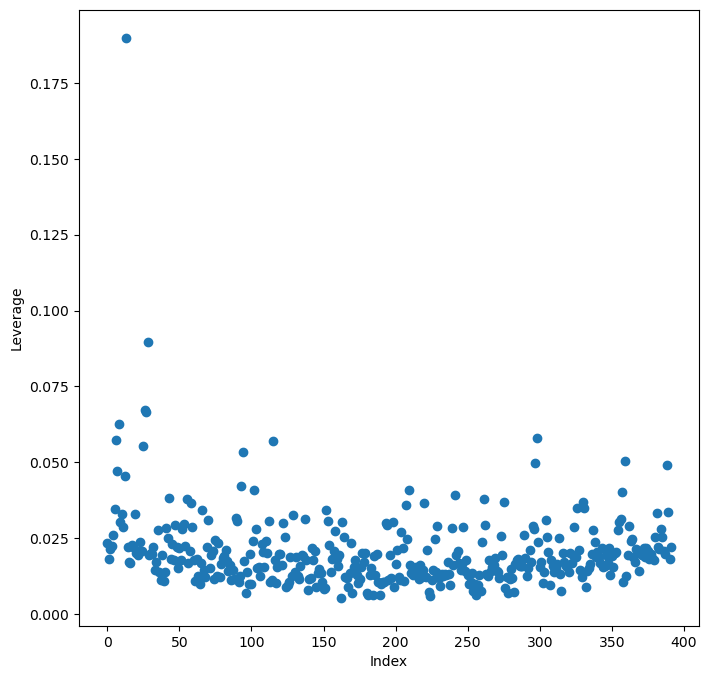

In [25]:
# Plot the leverage stats
infl = res.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [26]:
n=Auto.shape[0]
leverage_thres=8/n# 7 is the number of predictors
leverage_thres

0.02040816326530612

In [27]:
infl.hat_matrix_diag[13]#13 is the observation where the maximal leverage is attended

0.1899128860261588

We consider that there is no high leverage point since the maximal leverage is 0.19 (attained at point 13), which does not greatly exceed the threshold (the factor of excess is less than 10).

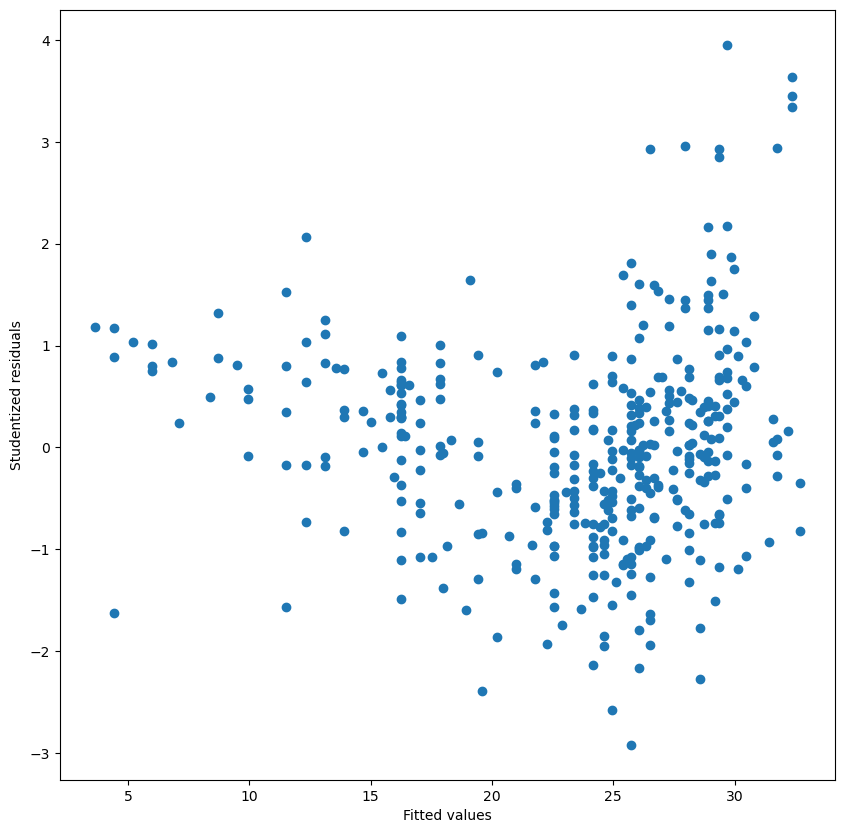

In [28]:
#Draw studentized residuals against fitted values
ax=subplots(figsize=(10,10))[1]
studentized_residuals = res.get_influence().resid_studentized_internal
ax.scatter(results.fittedvalues,studentized_residuals)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Studentized residuals");

In [29]:
df=pd.DataFrame({'fitted':res.fittedvalues,'studentized':studentized_residuals})
df[np.abs(df['studentized'])>3]

,fitted,studentized
242,32.078967,3.344681
320,33.539573,3.951894
323,32.949224,3.444885
324,31.491864,3.631071


Observations 242, 320, 323 and 324 are believed to be outliers.

### (e)

In [30]:
#Let's try out some interaction terms
model2 = smf.ols(formula='mpg ~ displacement*origin + year', data=Auto) # the formula automatically
# applies the hierarchy principle
print(summarize(model2.fit()))
model3 = smf.ols(formula='mpg ~ horsepower*weight +origin', data=Auto)
print(summarize(model3.fit()))

                        coef  std err       t  P>|t|
Intercept           -32.6362    4.725  -6.907  0.000
displacement          0.0065    0.009   0.712  0.477
origin                6.5265    0.946   6.902  0.000
displacement:origin  -0.0487    0.008  -5.785  0.000
year                  0.7494    0.056  13.418  0.000
                       coef   std err       t  P>|t|
Intercept          59.27830  2.718000  21.807  0.000
horsepower         -0.24080  0.027000  -8.852  0.000
weight             -0.00980  0.001000 -11.679  0.000
horsepower:weight   0.00005  0.000007   7.455  0.000
origin              0.93090  0.309000   3.017  0.003


Both the suggested interactions appear to be statistically significant.

### (f)

In [31]:
model4 = smf.ols(formula='mpg ~ horsepower+np.log(weight) +origin', data=Auto)
print(summarize(model4.fit()))

                    coef  std err       t  P>|t|
Intercept       153.0507   11.717  13.062  0.000
horsepower       -0.0504    0.010  -5.018  0.000
np.log(weight)  -15.8235    1.543 -10.253  0.000
origin            1.0169    0.323   3.148  0.002


In [32]:
model5 = smf.ols(formula='mpg ~ horsepower+np.sqrt(weight) +origin', data=Auto)
print(summarize(model5.fit()))

                    coef  std err       t  P>|t|
Intercept        57.5157    2.678  21.476    0.0
horsepower       -0.0500    0.011  -4.749    0.0
np.sqrt(weight)  -0.5678    0.059  -9.672    0.0
origin            1.1581    0.323   3.580    0.0


In [33]:
model6 = smf.ols(formula='mpg ~ horsepower+np.power(weight,2) +origin', data=Auto)
print(summarize(model6.fit()))

                             coef       std err       t  P>|t|
Intercept            3.336930e+01  1.002000e+00  33.296    0.0
horsepower          -6.780000e-02  1.100000e-02  -5.909    0.0
np.power(weight, 2) -5.903000e-07  8.610000e-08  -6.854    0.0
origin               1.787200e+00  3.250000e-01   5.507    0.0


The suggested models appear to have statistically significant terms including the transformed ones.

## Exercise 10

In [34]:
Carseats=load_data('Carseats')

In [35]:
Carseats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [36]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### (a)

In [37]:
y=Carseats['Sales']
X=MS(Carseats[['Price','Urban','US']]).fit_transform(Carseats)
model=sm.OLS(y,X)
result=model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


### (b)

The coefficient related to the prdictor 'Urban' is statistically insignificant suggesting that there is no relationship between this latter and the response.<br>
The relationship between US and the response is positive. It means that when a store is located in the US, it will sell an average of 1200 more units approximately.<br>
On the other hand, the relationship with 'Price' is negative. That means that an increase in 1 dollar in the price will cause the sales to decrease by approximately 55 units.

### (c)

$
\begin{equation*}
Sales = 13.0435 - 0.0545Price + 1.2006US - 0.0219Urban = 
\begin{cases}
                        13.0435−0.0219×Urban+1.2006×US−0.0545×Price &\text{$Urban=1,US=1$}\\
                        13.0435−0.0219×Urban+1.2006×Price &\text{$Urban=1,US=0$}\\
                        13.0435+1.2006×US−0.0545×Price &\text{$Urban=0,US=1$}\\
                        13.0435−0.0545×Price &\text{$Urban=0,US=0$}\\
\end{cases}
\end{equation*}
$

### (d)

Through reading the p-values obtained in question a we can reject the null hypothesis for both predictors 'Price' and 'US' but not for 'Urban'.

### (e)

In [38]:
Xnew=MS(Carseats[['Price','US']]).fit_transform(Carseats)
model_new=sm.OLS(y,Xnew)
result_new=model_new.fit()
summarize(result_new)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


### (f)

To answer this question we can use the $R^2$ coefficient.

In [39]:
print(" The R-squared for the regression model without Urban is ",result_new.rsquared)
print(" The R-squared for the regression model with Urban is ",result.rsquared)

 The R-squared for the regression model without Urban is  0.23926288842678567
 The R-squared for the regression model with Urban is  0.23927539218405547


We deduce that both models have namely the same $R^2$ value. However we must prefer the later model as it has a lower number of predictors. 

### (g)

In [40]:
result_new.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


### (h)

42

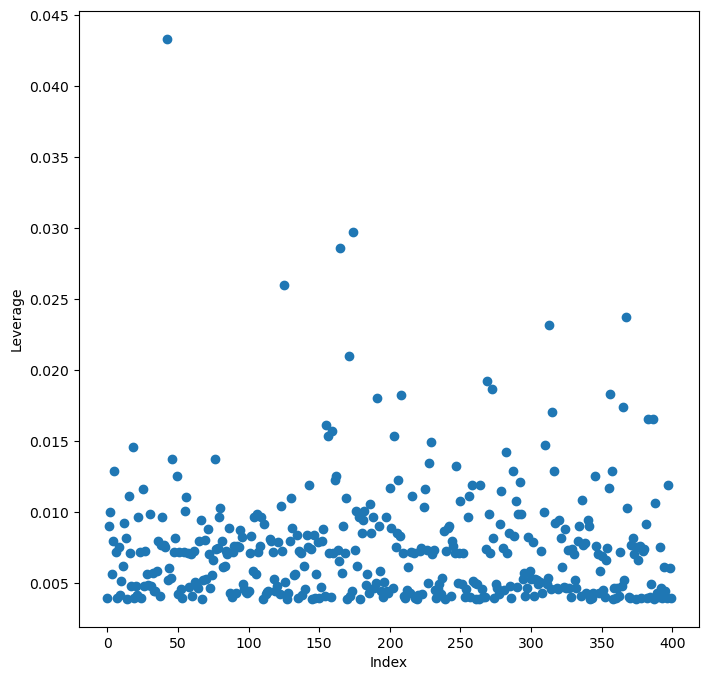

In [41]:
# Plot the leverage stats
infl = result_new.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(Xnew.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [42]:
n=Carseats.shape[0]
leverage_thres=3/n
leverage_thres

0.0075

We consider that there is no high leverage point since the maximal leverage is no more than 0.045 (attained at point 42), which does not greatly exceed the threshold of 0.0075.

In [43]:
studentized_residuals = result_new.get_influence().resid_studentized_internal
df=pd.DataFrame({'fitted':result_new.fittedvalues,'studentized':studentized_residuals})
df[np.abs(df['studentized'])>3].count()

fitted         0
studentized    0
dtype: int64

We conclude that there is no observation for which the absolute value of the studentized residual is greater than 3, which means that there is no (post analysis) potential outlier. 

## Exercise 11

In [44]:
np.random.seed(1) # In order to generate the same results whenever we run the code
rng = np.random.default_rng (1)
x = rng.normal(size =100)
y = 2 * x + rng.normal(size =100)

### (a)

In [45]:
df=pd.DataFrame({'x':x,'y':y})
X=MS(df[['x']],intercept=False).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
summarize(result)

,coef,std err,t,P>|t|
x,1.9762,0.117,16.898,0.0


The coefficient estimate is statistically significant. Therefore, we can reject the null hypothesis and conclude that there is a relationship between x and y.

### (b)

In [46]:
Y=MS(df[['y']],intercept=False).fit_transform(df)
model_new=sm.OLS(x,Y)
result_new=model_new.fit()
summarize(result_new)

,coef,std err,t,P>|t|
y,0.3757,0.022,16.898,0.0


Results of the new model yield to the same conclusion as for the existence of an evidence of relationship between x and y.

### (c)

Surprisingly, the coefficients of the fitted models in (a) and (b) are not the inverse of each other, though they should be apparently.<br>
The formulas of the coefficients are in equation (3.38) in the book. These formulas prove the observed fact since the noise inserted in y makes its variance different from the variance of x. 

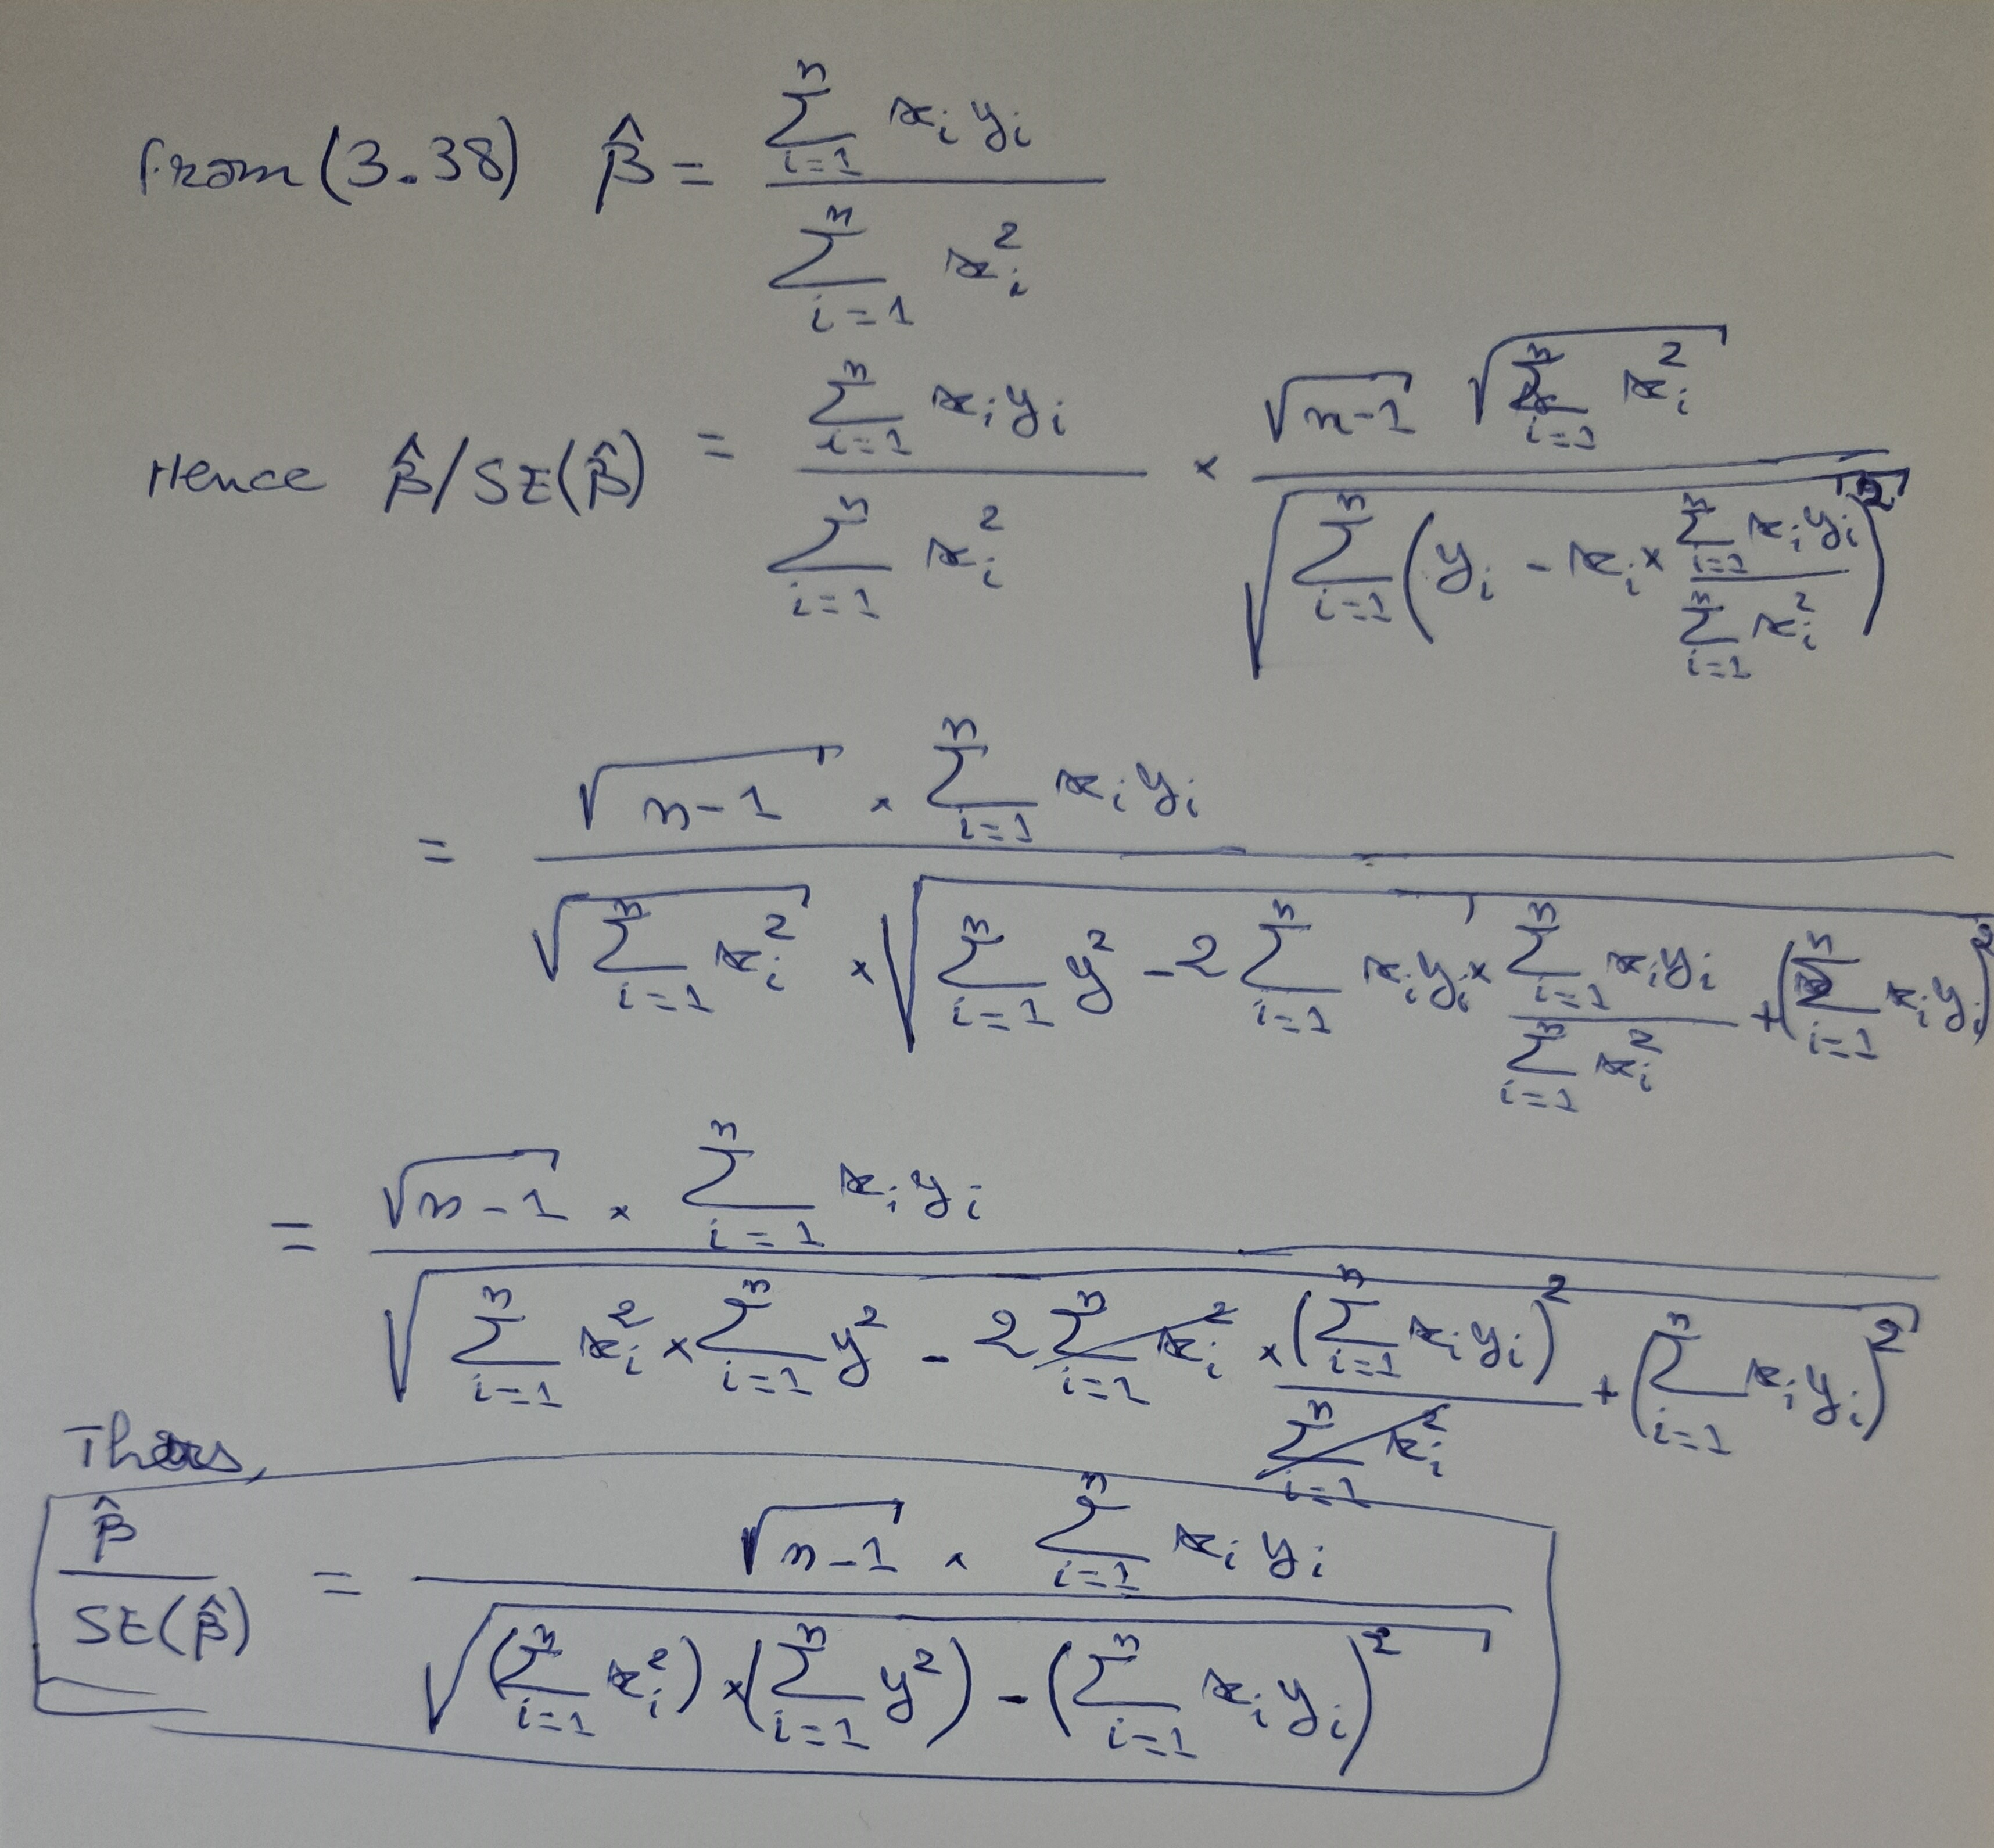

### (e)

The former obtained equation for t-stat is symmetric in y and x. Therefore, it is clear now why t-stats of both fitted models in (a) and (b) are equal. 

### (f)

In [47]:
# regress y onto x
X1=MS(df[['x']]).fit_transform(df)
model1=sm.OLS(y,X1)
result1=model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,-0.0760,0.101,-0.756,0.451
x,1.9686,0.118,16.734,0.000


In [48]:
# regress x onto y
Y1=MS(df[['y']]).fit_transform(df)
model2=sm.OLS(x,Y1)
result2=model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,0.0095,0.044,0.216,0.829
y,0.3763,0.022,16.734,0.000


t-stats for both models coefficients $\beta_{1}$ equal 16.734

## Exercise 12

### (a)

From the previous exercise we learn that the condition of the question becomes true when y and x have the same variance.

### (b)

In [49]:
x = np.arange(100)
y = x + np.random.normal(size=100)
df=pd.DataFrame({'x':x,'y':y})
#regression of y onto x
X=MS(df[['x']],intercept=False).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
summarize(result)

,coef,std err,t,P>|t|
x,1.0018,0.002,647.954,0.0


In [50]:
#regression of x onto y
Y=MS(df[['y']],intercept=False).fit_transform(df)
model_y=sm.OLS(x,Y)
result_y=model_y.fit()
summarize(result_y)

,coef,std err,t,P>|t|
y,0.998,0.002,647.954,0.0


### (c)

In [51]:
x = np.arange(100)
y = x[::-1]
df1=pd.DataFrame({'x':x,'y':y})

In [52]:
#regression of y onto x
X1=MS(df1[['x']],intercept=False).fit_transform(df1)
model1=sm.OLS(y,X1)
result1=model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
x,0.4925,0.087,5.63,0.0


In [53]:
#regression of x onto y
Y1=MS(df[['y']],intercept=False).fit_transform(df1)
model2=sm.OLS(x,Y1)
result2=model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
y,0.4925,0.087,5.63,0.0


## Exercise 13

In [54]:
np.random.seed(1)

### (a)

In [55]:
x=np.random.normal(loc=0.0,scale=1.0,size=100)

### (b)

In [56]:
eps=np.random.normal(loc=0.0,scale=0.25,size=100)

### (c)

In [57]:
y=-1+0.5*x+eps

In [58]:
y.shape

(100,)

In this linear model $\beta_{1}$ equals 0.5 and $\beta_{0}$ equals -1

### (d)

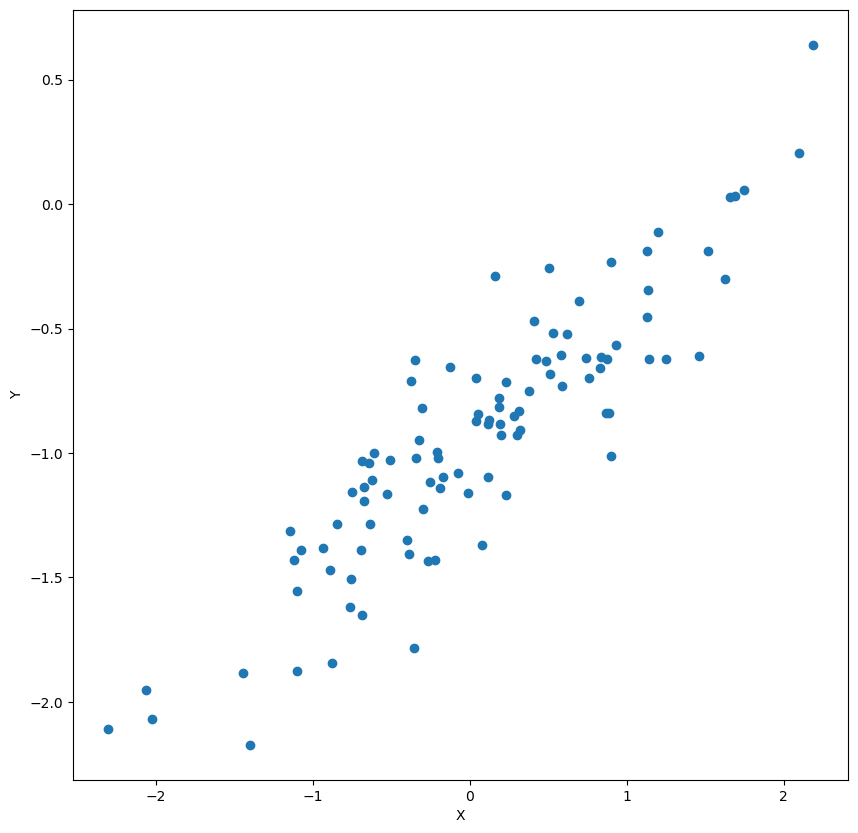

In [59]:
ax=subplots(figsize=(10,10))[1]
ax.scatter(x,y)
ax.set_xlabel("X")
ax.set_ylabel("Y");

### (e)

In [60]:
df=pd.DataFrame({'x':x,'y':y})
X=MS(df[['x']]).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           5.39e-36
Time:                        17:11:29   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficients obrained by the regression model are approximately the same as the coefficients formed in question (c)

### (f)

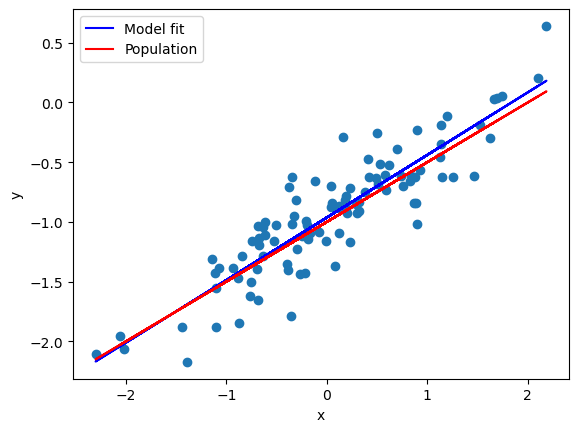

In [61]:
beta_0=result.params[0]
beta_1=result.params[1]
y_pred=[beta_0 + beta_1*xi for xi in x]
y_true=[-1.0+0.5*xi for xi in x]
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_pred, 'blue', label='Model fit')
plt.plot(x, y_true, 'red', label='Population')
plt.legend(loc='upper left');

### (g)

In [62]:
X1 = MS([poly('x', degree=2)]).fit_transform(df)
model1=sm.OLS(y,X1)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Sun, 10 Sep 2023   Prob (F-statistic):           1.32e-34
Time:                        17:11:29   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -0.9315      0.024    -39.544      0.000      -0.978      -0.885
poly(x, degree=2)[0]     4.6370      0.236     19.685      0.000       4.169       5.104
poly(x, degree=2)[1]     0.0427      0.236      0.181      0.856      -0.425       0.510
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value of the quadratic term shows that there is no significant relationship between $X^2$ and $Y$.<br>
Therefore, there is no evidence that the insertion of the quadratic term improves the model fit.

### (h)

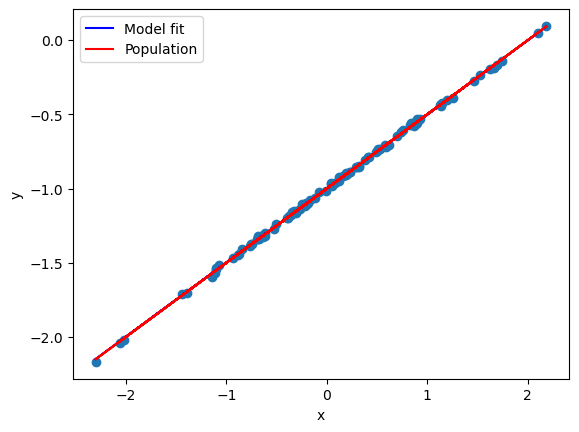

In [63]:
eps1 = np.random.normal(scale =0.01, size=100)
y1 = -1.0 + 0.5*x + eps1
df1=pd.DataFrame({'x1':x,'y1':y1})
X2=MS(df1[['x1']]).fit_transform(df1)
model2=sm.OLS(y1,X2)
result2=model2.fit()
beta_0=result2.params[0]
beta_1=result2.params[1]
y_pred=[beta_0 + beta_1*xi for xi in x]
y_true=[-1.0+0.5*xi for xi in x]
plt.scatter(x,y1)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_pred, 'blue', label='Model fit')
plt.plot(x, y_true, 'red', label='Population')
plt.legend(loc='upper left');

Reducing the noise makes the fitted model and the true one almost identical.

### (i)

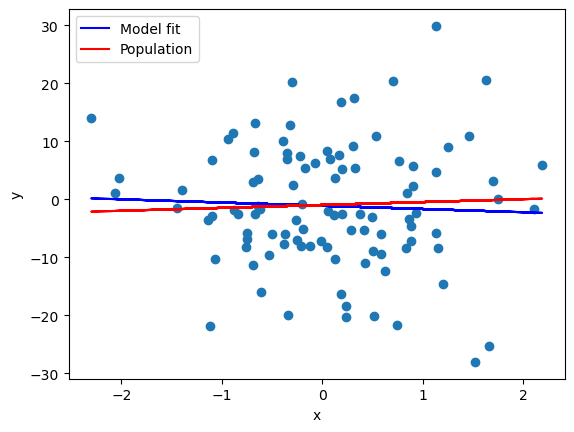

In [64]:
eps2 = np.random.normal(scale =10, size=100)
y2 = -1.0 + 0.5*x + eps2
df2=pd.DataFrame({'x2':x,'y2':y2})
X3=MS(df2[['x2']]).fit_transform(df2)
model3=sm.OLS(y2,X3)
result3=model3.fit()
beta_0=result3.params[0]
beta_1=result3.params[1]
y_pred=[beta_0 + beta_1*xi for xi in x]
y_true=[-1.0+0.5*xi for xi in x]
plt.scatter(x,y2)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y_pred, 'blue', label='Model fit')
plt.plot(x, y_true, 'red', label='Population')
plt.legend(loc='upper left');

Increasing the noise makes the fitted model and the true more distinguishable.

In [65]:
result.conf_int(alpha=0.05)

,0,1
intercept,-1.009870,-0.916623
x,0.471307,0.576407


In [66]:
result2.conf_int(alpha=0.05)

,0,1
intercept,-1.001895,-0.997859
x1,0.497315,0.501864


In [67]:
result3.conf_int(alpha=0.05)

,0,1
intercept,-3.270073,0.990839
x2,-2.957781,1.844723


As exepected, the more you add noise the larger are the confidence intervals for the regression coefficients. The inverse is true.

## Exercise 14

### (a)

In [68]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size =100)
x2 = 0.5 * x1 + rng.normal(size =100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size =100)

The regression coefficients are:<br>
$\beta_{0}=2$<br>
$\beta_{1}=2$<br>
$\beta_{2}=0.3$

### (b)

In [69]:
np.corrcoef(x1,x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

The correlation between x1 and x2 is 0.772

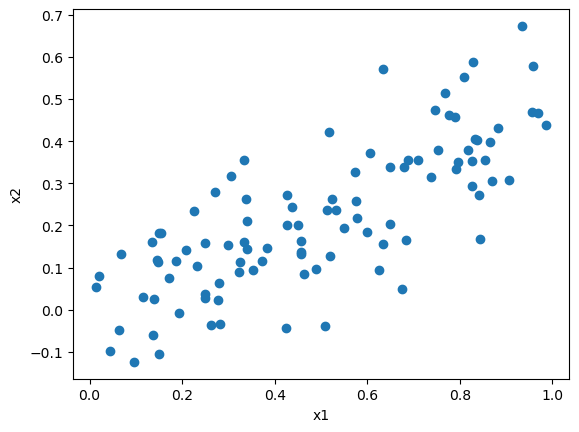

In [70]:
plt.scatter(x1,x2)
plt.xlabel('x1')
plt.ylabel('x2');

### (c)

In [71]:
df=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
X=MS(['x1','x2']).fit_transform(df)
model=sm.OLS(y,X)
result=model.fit()
print('beta0 is',result.params[0])
print('beta1 is',result.params[1])
print('beta2 is',result.params[2])


beta0 is 1.9579092911366915
beta1 is 1.6153676985271606
beta2 is 0.9427766991595027


The estimated coefficients by the regression model are clearly different from the true ones except for $\beta_{0}$ 

In [72]:
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


Based on the p-values we can reject the null hypothesis of $H_{0}: \beta_{1}=0$ but we cannot the null hypothesis of $H_{0}: \beta_{2}=0$

### (d)

In [73]:
X1=MS(['x1']).fit_transform(df)
model1=sm.OLS(y,X1)
result1=model1.fit()
summarize(result1)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


The p-values show that we can reject the null hypothesis $H_{0}: \beta_{1}=0$. Moreover, we notice that both obtained coefficients are improved since they are closer enough to the real ones.

### (e)

In [74]:
X2=MS(['x2']).fit_transform(df)
model2=sm.OLS(y,X2)
result2=model2.fit()
summarize(result2)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


The results has significantly changed relatively to (c). the coefficient for x2 has become even greater than the intercept coefficient.<br>
Furthermore, base on the p-values we can reject the null hypothesis $H_{0}: \beta_{1}=0$.

### (f)

The high correlation between x1 and x2 as shown above suggests that there is a high deal of colinearity. This explains why fitted one by one we can reject the null hypotheses, but when the predictors are assembled together the p-values show that one of them should be dismissed. In that sense there is no contradiction.

### (g)

In [75]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [76]:
#Model with both updated x1 and x2
df2=pd.DataFrame({'x1':x1,'x2':x2,'y':y})
X3=MS(['x1','x2']).fit_transform(df2)
model3=sm.OLS(y,X3)
result3=model3.fit()
summarize(result3)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


In [77]:
# Fit a new model with only x1
X4=MS(['x1']).fit_transform(df2)
model4=sm.OLS(y,X4)
result4=model4.fit()
summarize(result4)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


In [78]:
# Fit a new model with only x1
X5=MS(['x2']).fit_transform(df2)
model5=sm.OLS(y,X5)
result5=model5.fit()
summarize(result5)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


The insertion of a new observation caused the regression coefficient related to $x_{1}$ to decrease and the other related to $x_{2}$ to increase in all the models.

In order to evaluate wether the added observation is an outlier or a leverage point, you can exploit, for the three model combinations, the appropriate type of figures (resid vs studentized resid)  as we did in the previous exercises. I left it here to your own discovery.<br>
Finally it is very likely that the obeservation is an outlier and/or a leverage point since its insertion has clearly inlfluenced the model results.

## Exercise 15

In [79]:
Boston=load_data('Boston')

In [80]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [81]:
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### (a)

In [82]:
result=[]
y=Boston['crim']
for i in range(1,13,1):
    predictor=Boston.columns[i]
    x=Boston.loc[:,predictor]
    x=sm.add_constant(x)
    model=sm.OLS(y,x)
    result.append({predictor: model.fit().pvalues[1]})
result

[{'zn': 5.50647210767904e-06},
 {'indus': 1.4503489330272292e-21},
 {'chas': 0.20943450153520068},
 {'nox': 3.751739260356923e-23},
 {'rm': 6.346702984687803e-07},
 {'age': 2.854869350244178e-16},
 {'dis': 8.519948766926204e-19},
 {'rad': 2.6938443981865184e-56},
 {'tax': 2.357126835257249e-47},
 {'ptratio': 2.942922447359719e-11},
 {'lstat': 2.6542772314731968e-27},
 {'medv': 1.1739870821943443e-19}]

All predictors are significant except 'chas'.

### (b)

In [83]:
X=MS(Boston.columns.drop(['crim'])).fit_transform(Boston)
model=sm.OLS(y,X)
result_new=model.fit()
summarize(result_new)

,coef,std err,t,P>|t|
intercept,13.7784,7.082,1.946,0.052
zn,0.0457,0.019,2.433,0.015
indus,-0.0584,0.084,-0.698,0.486
chas,-0.8254,1.183,-0.697,0.486
nox,-9.9576,5.290,-1.882,0.060
rm,0.6289,0.607,1.036,0.301
age,-0.0008,0.018,-0.047,0.962
dis,-1.0122,0.282,-3.584,0.000
rad,0.6125,0.088,6.997,0.000
tax,-0.0038,0.005,-0.730,0.466


The null hypothesis given in the question is rejected for the following predictors : zn, dis, rad and medv

### (c)

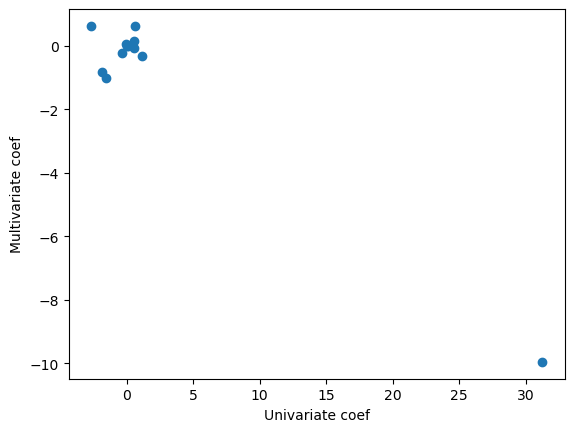

In [84]:
result1=[]
for i in range(1,13,1):
    predictor=Boston.columns[i]
    x=Boston.loc[:,predictor]
    x=sm.add_constant(x)
    model1=sm.OLS(y,x)
    result1.append(model1.fit().params[1])
plt.scatter(result1,result_new.params[1:14])
plt.xlabel('Univariate coef')
plt.ylabel('Multivariate coef');

In [85]:
result_new.pvalues[2:]

indus      4.857094e-01
chas       4.858406e-01
nox        6.036986e-02
rm         3.007385e-01
age        9.623231e-01
dis        3.725942e-04
rad        8.588123e-12
tax        4.657565e-01
ptratio    1.033932e-01
lstat      6.739844e-02
medv       2.605302e-04
dtype: float64

We notice that the outlier point returns to the 'Nox' coefficient. Let's remove this point from the plot and show it again

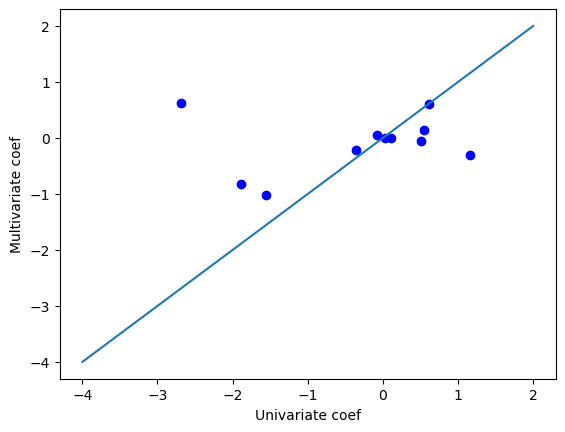

In [86]:
plt.scatter(result1[0:3],result_new.params[1:4],color='blue')
plt.scatter(result1[4:12],result_new.params[5:14],color='blue')
plt.plot([-4,2], [-4,2]) 
plt.xlabel('Univariate coef')
plt.ylabel('Multivariate coef');

In [87]:
df=pd.DataFrame({'Univariate':result1,'Multivariate':result_new.params[1:]})

In [88]:
df

,Univariate,Multivariate
zn,-0.073935,0.045710
indus,0.509776,-0.058350
chas,-1.892777,-0.825378
nox,31.248531,-9.957587
rm,-2.684051,0.628911
age,0.107786,-0.000848
dis,-1.550902,-1.012247
rad,0.617911,0.612465
tax,0.029742,-0.003776
ptratio,1.151983,-0.304073


We notice that features 'age', 'rad', 'tax', 'medv' and 'zn' are the closer to the fitting line. However, since we failed to reject the null hyoptheses for 'age' and 'tax' their related points should have no meaning.

### (d)

In [89]:
nl_results=[]
for i in range(1,13):
    predictor=Boston.columns[i]
    x=Boston.loc[:,predictor]
    X = MS([poly(predictor, degree=3)]).fit_transform(Boston)
    model=sm.OLS(y,X)
    nl_results.append({predictor:model.fit().pvalues[0:4]})
nl_results

[{'zn': intercept                1.547150e-20
  poly(zn, degree=3)[0]    4.697806e-06
  poly(zn, degree=3)[1]    4.420507e-03
  poly(zn, degree=3)[2]    2.295386e-01
  dtype: float64},
 {'indus': intercept                   3.606468e-25
  poly(indus, degree=3)[0]    8.854243e-24
  poly(indus, degree=3)[1]    1.086057e-03
  poly(indus, degree=3)[2]    1.196405e-12
  dtype: float64},
 {'chas': intercept                  1.233651e-19
  poly(chas, degree=3)[0]    1.276106e-19
  poly(chas, degree=3)[1]    1.253723e-19
  poly(chas, degree=3)[2]    1.526557e-04
  dtype: float64},
 {'nox': intercept                 2.742908e-26
  poly(nox, degree=3)[0]    2.457491e-26
  poly(nox, degree=3)[1]    7.736755e-05
  poly(nox, degree=3)[2]    6.961110e-16
  dtype: float64},
 {'rm': intercept                1.026665e-20
  poly(rm, degree=3)[0]    5.128048e-07
  poly(rm, degree=3)[1]    1.508545e-03
  poly(rm, degree=3)[2]    5.085751e-01
  dtype: float64},
 {'age': intercept                 5.918933e-

Cubic relationships are not significant for predictors 'rm', 'lstat', 'tax', 'rad' and 'zn'. On the other hand we can assert that there is a cubic association relationships regarding features 'indus', 'chas', 'nox', 'age', 'dis', 'ptratio' and 'medv'.